In [1]:

import argparse
import yaml
import math
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.func import jacrev
import pickle

import os

from helpers.data import get_pdf_toy, read_in_data
from helpers.ansatz import q, eps, get_taylor_expanded_ansatz
from helpers.training import get_loss, train

# Set PyTorch default dtype to float64
torch.set_default_dtype(torch.double)

In [2]:
from scipy.optimize import curve_fit

Optimized Parameters: [-3.16544036e-01  9.74963878e-01 -3.23779915e-02 -1.15210940e-05]


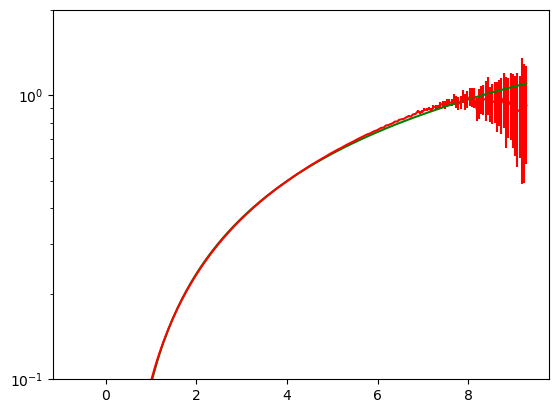

In [ ]:
distribution = "thrust"
order_to_match = 1
device = "cpu"

data_dict, t_bins, t_bin_centers = read_in_data(distribution, order_to_match, device)

alpha = 0.15
data = data_dict[alpha]
y, y_err = data
y_err = np.clip(y_err, 1e-10, None)
plt.errorbar(t_bin_centers, y[:,0], yerr=y_err[:,0], c = "red", label = "LO Data")


def polynomial(t, coeffs):
    return sum(c * t**i / math.factorial(i) for i, c in enumerate(coeffs)) * (t > np.log(3/2))



# scipy fit

def fit_func(t, *params):
    return 0.15 * polynomial(t, params)

c = [0, 1, 0, 0]


popt, pcov = curve_fit(fit_func, t_bin_centers.cpu().detach().numpy(), y[:,0], p0=c, sigma=np.power(y_err[:,0], 0.25), maxfev=10000)


# plt.plot(t_bin_centers, 0.15 * polynomial(t_bin_centers, c), c = "blue", label = "Polynomial Fit")
plt.plot(t_bin_centers, 0.15 * polynomial(t_bin_centers, popt), c = "green", label = "Optimized Fit")

plt.yscale("log")
plt.ylim(1e-1, 2)

print("Optimized Parameters:", popt)



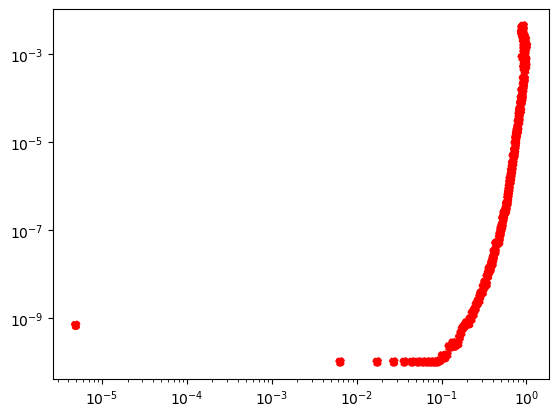

In [9]:
# plot y vs y_err

plt.scatter(y, y_err[:,0], c = "red", linestyle = "dashed")
plt.xscale("log")
plt.yscale("log")